In [65]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder

from sklearn.model_selection import train_test_split
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

from sklearn.metrics import confusion_matrix, f1_score, accuracy_score, classification_report

In [59]:
# 경고 메세지 숨기기 
import warnings
warnings.filterwarnings(action='ignore')

# 매직명령어 => 쥬피터노트북에서 그래프 예쁘게 삽입하는 기능
%matplotlib inline

import matplotlib
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

matplotlib.rcParams['axes.unicode_minus'] = False
plt.rcParams['font.size'] = 11.0
plt.rcParams['font.family'] = 'Malgun Gothic'

In [4]:
df = pd.read_csv('data/titanic.csv')
df.sample(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
553,554,1,3,"Leeni, Mr. Fahim (""Philip Zenni"")",male,22.0,0,0,2620,7.2250,NaN,C
423,424,0,3,"Danbom, Mrs. Ernst Gilbert (Anna Sigrid Maria ...",female,28.0,1,1,347080,14.4000,NaN,S
115,116,0,3,"Pekoniemi, Mr. Edvard",male,21.0,0,0,STON/O 2. 3101294,7.9250,NaN,S
143,144,0,3,"Burke, Mr. Jeremiah",male,19.0,0,0,365222,6.7500,NaN,Q
645,646,1,1,"Harper, Mr. Henry Sleeper",male,48.0,1,0,PC 17572,76.7292,D33,C


# 전처리

In [7]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [9]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [13]:
df['Age'].fillna(df['Age'].mean(), inplace=True)
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [27]:
encoder = LabelEncoder()
sex_encoded = encoder.fit_transform(df['Sex'])
sex_encoded
df['Sex']=sex_encoded

df.sample(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
48,49,0,3,"Samaan, Mr. Youssef",1,29.699118,2,0,2662,21.6792,NaN,C
826,827,0,3,"Lam, Mr. Len",1,29.699118,0,0,1601,56.4958,NaN,S
102,103,0,1,"White, Mr. Richard Frasar",1,21.000000,0,1,35281,77.2875,D26,S
180,181,0,3,"Sage, Miss. Constance Gladys",0,29.699118,8,2,CA. 2343,69.5500,NaN,S
719,720,0,3,"Johnson, Mr. Malkolm Joackim",1,33.000000,0,0,347062,7.7750,NaN,S


In [28]:
x_data = df[['Fare', 'Sex', 'Pclass', 'Age']].values
y_data = df[['Survived']].values

## 정규화

In [29]:
# 정규화
scalerF = MinMaxScaler()
x_dataN = scalerF.fit_transform(x_data)
x_dataN

array([[0.01415106, 1.        , 1.        , 0.27117366],
       [0.13913574, 0.        , 0.        , 0.4722292 ],
       [0.01546857, 0.        , 1.        , 0.32143755],
       ...,
       [0.04577135, 0.        , 1.        , 0.36792055],
       [0.0585561 , 1.        , 0.        , 0.32143755],
       [0.01512699, 1.        , 1.        , 0.39683338]])

In [30]:
y_data

array([[0],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
    

# trainset, testset 분리

In [66]:
x_train, x_test, y_train, y_test = train_test_split( x_dataN, y_data, test_size=0.3, stratify=y_data)

# 텐서

## 학습

In [67]:
x = tf.constant(x_train, tf.float32)
y = tf.constant(y_train, tf.float32)

initX = tf.initializers.GlorotUniform()
w = tf.Variable(initX( shape=[4,1] ))
b = tf.Variable(initX( shape=[1] ))

In [68]:
# cost 함수
def compute_loss():
    z = tf.matmul(x,w) + b
    cost_i = tf.nn.sigmoid_cross_entropy_with_logits( labels=y, logits=z)  
    cost = tf.reduce_mean( cost_i )
    return cost

In [69]:
optimizer = Adam(0.1)
for i in range(1000):
    optimizer.minimize( compute_loss, var_list=[w,b])
    print(i, 'cost:', compute_loss().numpy() )

0 cost: 0.8618264
1 cost: 0.78208464
2 cost: 0.72193617
3 cost: 0.6808261
4 cost: 0.65650094
5 cost: 0.6453592
6 cost: 0.64297956
7 cost: 0.6450095
8 cost: 0.647959
9 cost: 0.64953583
10 cost: 0.6485585
11 cost: 0.64467317
12 cost: 0.6380644
13 cost: 0.62923044
14 cost: 0.6188319
15 cost: 0.6075867
16 cost: 0.5961997
17 cost: 0.58530474
18 cost: 0.57541966
19 cost: 0.56690735
20 cost: 0.55994874
21 cost: 0.55453306
22 cost: 0.5504724
23 cost: 0.54744047
24 cost: 0.5450358
25 cost: 0.5428534
26 cost: 0.5405538
27 cost: 0.5379122
28 cost: 0.53484005
29 cost: 0.53137666
30 cost: 0.5276584
31 cost: 0.5238754
32 cost: 0.5202255
33 cost: 0.5168767
34 cost: 0.513942
35 cost: 0.51146936
36 cost: 0.5094457
37 cost: 0.5078099
38 cost: 0.5064708
39 cost: 0.50532836
40 cost: 0.5042891
41 cost: 0.5032796
42 cost: 0.5022523
43 cost: 0.5011871
44 cost: 0.50008833
45 cost: 0.49897876
46 cost: 0.49789146
47 cost: 0.49686202
48 cost: 0.4959216
49 cost: 0.4950914
50 cost: 0.49438006
51 cost: 0.49378362
5

423 cost: 0.47506508
424 cost: 0.4750647
425 cost: 0.4750645
426 cost: 0.4750643
427 cost: 0.4750641
428 cost: 0.47506386
429 cost: 0.47506362
430 cost: 0.4750634
431 cost: 0.47506323
432 cost: 0.47506297
433 cost: 0.47506273
434 cost: 0.47506264
435 cost: 0.47506243
436 cost: 0.47506228
437 cost: 0.4750621
438 cost: 0.4750619
439 cost: 0.4750618
440 cost: 0.4750616
441 cost: 0.47506142
442 cost: 0.47506127
443 cost: 0.47506112
444 cost: 0.47506097
445 cost: 0.47506082
446 cost: 0.47506067
447 cost: 0.47506058
448 cost: 0.47506043
449 cost: 0.47506037
450 cost: 0.4750602
451 cost: 0.47506005
452 cost: 0.47505993
453 cost: 0.47505978
454 cost: 0.4750597
455 cost: 0.47505966
456 cost: 0.47505954
457 cost: 0.4750594
458 cost: 0.4750594
459 cost: 0.47505924
460 cost: 0.47505915
461 cost: 0.47505906
462 cost: 0.47505897
463 cost: 0.47505885
464 cost: 0.47505882
465 cost: 0.4750587
466 cost: 0.47505867
467 cost: 0.47505862
468 cost: 0.47505847
469 cost: 0.4750584
470 cost: 0.47505838
471 cos

850 cost: 0.4750562
851 cost: 0.47505626
852 cost: 0.4750562
853 cost: 0.4750562
854 cost: 0.4750562
855 cost: 0.4750562
856 cost: 0.4750562
857 cost: 0.47505626
858 cost: 0.4750562
859 cost: 0.47505617
860 cost: 0.4750562
861 cost: 0.4750562
862 cost: 0.47505626
863 cost: 0.47505626
864 cost: 0.4750562
865 cost: 0.4750562
866 cost: 0.47505626
867 cost: 0.4750562
868 cost: 0.47505617
869 cost: 0.4750562
870 cost: 0.47505617
871 cost: 0.4750562
872 cost: 0.47505617
873 cost: 0.47505617
874 cost: 0.4750562
875 cost: 0.4750562
876 cost: 0.4750562
877 cost: 0.4750562
878 cost: 0.47505617
879 cost: 0.47505617
880 cost: 0.47505617
881 cost: 0.47505617
882 cost: 0.47505617
883 cost: 0.47505617
884 cost: 0.47505617
885 cost: 0.47505617
886 cost: 0.47505617
887 cost: 0.47505617
888 cost: 0.47505617
889 cost: 0.47505617
890 cost: 0.47505617
891 cost: 0.47505617
892 cost: 0.47505617
893 cost: 0.47505617
894 cost: 0.47505617
895 cost: 0.47505617
896 cost: 0.47505617
897 cost: 0.47505617
898 cost: 

## 예측

In [74]:
# 예측함수
def hxfn(xdata):
    xd = tf.constant(xdata, tf.float32)
    z = tf.matmul(xd, w) + b
    hx = tf.nn.sigmoid(z)
    return (hx.numpy()>0.5) +0

In [75]:
x_t = scalerF.transform([[30, 1, 1, 25]])
x_t

array([[0.0585561 , 1.        , 0.        , 0.30887158]])

In [76]:
hxfn(x_t)

array([[1]])

# 케라스

## 학습

In [70]:
# 케라스
dense = Dense( units=1, input_dim=4, activation='sigmoid')
model = Sequential( [dense] )
model.compile(loss='binary_crossentropy', optimizer=Adam(0.1), metrics=['acc'])
h = model.fit( x_train, y_train, epochs=1000)

Epoch 1/1000
20/20 [==============================] - 0s 922us/step - loss: 0.6484 - acc: 0.5987
Epoch 2/1000
20/20 [==============================] - 0s 630us/step - loss: 0.5395 - acc: 0.7640
Epoch 3/1000
20/20 [==============================] - 0s 577us/step - loss: 0.5132 - acc: 0.7769
Epoch 4/1000
20/20 [==============================] - 0s 630us/step - loss: 0.5054 - acc: 0.7721
Epoch 5/1000
20/20 [==============================] - 0s 525us/step - loss: 0.5043 - acc: 0.7705
Epoch 6/1000
20/20 [==============================] - 0s 577us/step - loss: 0.4956 - acc: 0.7705
Epoch 7/1000
20/20 [==============================] - 0s 577us/step - loss: 0.4943 - acc: 0.7721
Epoch 8/1000
20/20 [==============================] - 0s 577us/step - loss: 0.4981 - acc: 0.7689
Epoch 9/1000
20/20 [==============================] - 0s 630us/step - loss: 0.4890 - acc: 0.7737
Epoch 10/1000
20/20 [==============================] - 0s 683us/step - loss: 0.4873 - acc: 0.7753
Epoch 11/1000
20/20 [========

20/20 [==============================] - 0s 577us/step - loss: 0.4794 - acc: 0.7865
Epoch 168/1000
20/20 [==============================] - 0s 577us/step - loss: 0.4771 - acc: 0.7929
Epoch 169/1000
20/20 [==============================] - 0s 577us/step - loss: 0.4778 - acc: 0.7785
Epoch 170/1000
20/20 [==============================] - 0s 525us/step - loss: 0.4848 - acc: 0.7817
Epoch 171/1000
20/20 [==============================] - 0s 525us/step - loss: 0.4765 - acc: 0.7801
Epoch 172/1000
20/20 [==============================] - 0s 525us/step - loss: 0.4789 - acc: 0.7913
Epoch 173/1000
20/20 [==============================] - 0s 525us/step - loss: 0.4845 - acc: 0.7849
Epoch 174/1000
20/20 [==============================] - 0s 577us/step - loss: 0.4797 - acc: 0.7881
Epoch 175/1000
20/20 [==============================] - 0s 524us/step - loss: 0.4808 - acc: 0.7865
Epoch 176/1000
20/20 [==============================] - 0s 577us/step - loss: 0.4781 - acc: 0.8042
Epoch 177/1000
20/20 [===

20/20 [==============================] - 0s 630us/step - loss: 0.4767 - acc: 0.7817
Epoch 332/1000
20/20 [==============================] - 0s 577us/step - loss: 0.4818 - acc: 0.7865
Epoch 333/1000
20/20 [==============================] - 0s 577us/step - loss: 0.4784 - acc: 0.7961
Epoch 334/1000
20/20 [==============================] - 0s 525us/step - loss: 0.4789 - acc: 0.7833
Epoch 335/1000
20/20 [==============================] - 0s 525us/step - loss: 0.4812 - acc: 0.7881
Epoch 336/1000
20/20 [==============================] - 0s 577us/step - loss: 0.4794 - acc: 0.7865
Epoch 337/1000
20/20 [==============================] - 0s 577us/step - loss: 0.4796 - acc: 0.7913
Epoch 338/1000
20/20 [==============================] - 0s 577us/step - loss: 0.4772 - acc: 0.7978
Epoch 339/1000
20/20 [==============================] - 0s 526us/step - loss: 0.4774 - acc: 0.7881
Epoch 340/1000
20/20 [==============================] - 0s 525us/step - loss: 0.4792 - acc: 0.7817
Epoch 341/1000
20/20 [===

20/20 [==============================] - 0s 577us/step - loss: 0.4800 - acc: 0.7833
Epoch 496/1000
20/20 [==============================] - 0s 577us/step - loss: 0.4779 - acc: 0.7833
Epoch 497/1000
20/20 [==============================] - 0s 525us/step - loss: 0.4796 - acc: 0.7945
Epoch 498/1000
20/20 [==============================] - 0s 525us/step - loss: 0.4776 - acc: 0.7961
Epoch 499/1000
20/20 [==============================] - 0s 577us/step - loss: 0.4821 - acc: 0.7801
Epoch 500/1000
20/20 [==============================] - 0s 525us/step - loss: 0.4788 - acc: 0.7865
Epoch 501/1000
20/20 [==============================] - 0s 525us/step - loss: 0.4786 - acc: 0.7881
Epoch 502/1000
20/20 [==============================] - 0s 525us/step - loss: 0.4816 - acc: 0.7817
Epoch 503/1000
20/20 [==============================] - 0s 525us/step - loss: 0.4790 - acc: 0.7897
Epoch 504/1000
20/20 [==============================] - 0s 525us/step - loss: 0.4761 - acc: 0.7994
Epoch 505/1000
20/20 [===

20/20 [==============================] - 0s 630us/step - loss: 0.4802 - acc: 0.7897
Epoch 660/1000
20/20 [==============================] - 0s 577us/step - loss: 0.4837 - acc: 0.7913
Epoch 661/1000
20/20 [==============================] - 0s 577us/step - loss: 0.4800 - acc: 0.7897
Epoch 662/1000
20/20 [==============================] - 0s 577us/step - loss: 0.4777 - acc: 0.7785
Epoch 663/1000
20/20 [==============================] - 0s 525us/step - loss: 0.4778 - acc: 0.7945
Epoch 664/1000
20/20 [==============================] - 0s 630us/step - loss: 0.4785 - acc: 0.7817
Epoch 665/1000
20/20 [==============================] - 0s 577us/step - loss: 0.4765 - acc: 0.7913
Epoch 666/1000
20/20 [==============================] - 0s 577us/step - loss: 0.4787 - acc: 0.7897
Epoch 667/1000
20/20 [==============================] - 0s 577us/step - loss: 0.4853 - acc: 0.7801
Epoch 668/1000
20/20 [==============================] - 0s 630us/step - loss: 0.4796 - acc: 0.7865
Epoch 669/1000
20/20 [===

20/20 [==============================] - 0s 577us/step - loss: 0.4780 - acc: 0.7913
Epoch 824/1000
20/20 [==============================] - 0s 525us/step - loss: 0.4803 - acc: 0.7833
Epoch 825/1000
20/20 [==============================] - 0s 577us/step - loss: 0.4775 - acc: 0.7913
Epoch 826/1000
20/20 [==============================] - 0s 630us/step - loss: 0.4788 - acc: 0.7865
Epoch 827/1000
20/20 [==============================] - 0s 525us/step - loss: 0.4931 - acc: 0.7721
Epoch 828/1000
20/20 [==============================] - 0s 577us/step - loss: 0.4771 - acc: 0.7769
Epoch 829/1000
20/20 [==============================] - 0s 525us/step - loss: 0.4836 - acc: 0.7849
Epoch 830/1000
20/20 [==============================] - 0s 577us/step - loss: 0.4830 - acc: 0.7817
Epoch 831/1000
20/20 [==============================] - 0s 525us/step - loss: 0.4793 - acc: 0.7913
Epoch 832/1000
20/20 [==============================] - 0s 577us/step - loss: 0.4790 - acc: 0.7897
Epoch 833/1000
20/20 [===

20/20 [==============================] - 0s 525us/step - loss: 0.4793 - acc: 0.7881
Epoch 988/1000
20/20 [==============================] - 0s 525us/step - loss: 0.4785 - acc: 0.7865
Epoch 989/1000
20/20 [==============================] - 0s 525us/step - loss: 0.4796 - acc: 0.7769
Epoch 990/1000
20/20 [==============================] - 0s 577us/step - loss: 0.4792 - acc: 0.7897
Epoch 991/1000
20/20 [==============================] - 0s 577us/step - loss: 0.4804 - acc: 0.7817
Epoch 992/1000
20/20 [==============================] - 0s 525us/step - loss: 0.4781 - acc: 0.7881
Epoch 993/1000
20/20 [==============================] - 0s 525us/step - loss: 0.4778 - acc: 0.7945
Epoch 994/1000
20/20 [==============================] - 0s 577us/step - loss: 0.4807 - acc: 0.7801
Epoch 995/1000
20/20 [==============================] - 0s 577us/step - loss: 0.4767 - acc: 0.7897
Epoch 996/1000
20/20 [==============================] - 0s 525us/step - loss: 0.4800 - acc: 0.7865
Epoch 997/1000
20/20 [===

## 예측

In [77]:
(model.predict(x_t) > 0.5) +0

array([[1]])

# 평가지표

## 텐서

In [78]:
conf_mat1 = confusion_matrix( y_test, hxfn(x_test))
accuracy1 = accuracy_score( y_test, hxfn(x_test))
f1_1 = f1_score( y_test, hxfn(x_test))

print('confusion matix:')
print(conf_mat1)
print('='*50)
print('accuracy:', accuracy1)
print('='*50)
print('f1 score:', f1_1)

confusion matix:
[[135  30]
 [ 21  82]]
accuracy: 0.8097014925373134
f1 score: 0.7627906976744185


## 케라스

In [80]:
pred = (model.predict(x_test) > 0.5) +0

conf_mat2 = confusion_matrix( y_test, pred)
accuracy2 = accuracy_score( y_test, pred)
f1_2 = f1_score( y_test, pred)

print('confusion matix:')
print(conf_mat2)
print('='*50)
print('accuracy:', accuracy2)
print('='*50)
print('f1 score:', f1_2)

confusion matix:
[[131  34]
 [ 18  85]]
accuracy: 0.8059701492537313
f1 score: 0.7657657657657657


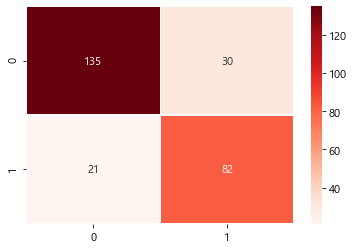

In [81]:
sns.heatmap( conf_mat1, annot=True, fmt='d', linewidths=0.2, cmap='Reds')
plt.show()